# MINIST Dataset Notebook
## Informational Links about the MNIST dataset
**The gzip folders used for this MNIST dataset exercise can be found [here](http://yann.lecun.com/exdb/mnist/).**

### [Brief Explanation](https://corochann.com/mnist-dataset-introduction-1138.html)
#### The dataset consists of:
1. handwritten digit image:
    * grayscale image
    * 28x28 scale
2. label:
    * digit represented by the image
    * between 0-9

In [1]:
# Imports
import gzip
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read the file content from the gzipped folders

In [2]:
# Source code adapted from:
# - https://stackoverflow.com/questions/48257255/how-to-import-pre-downloaded-mnist-dataset-from-a-specific-directory-or-folder
# - https://docs.python.org/3/library/gzip.html

In [3]:
# Read a gzip compressed file
# Handwritten image folder
with gzip.open('gzip_folders/t10k-images-idx3-ubyte.gz', 'rb') as t10k_img:
    image_t10k = t10k_img.read()

In [4]:
# Read a gzip compressed file
# Labels folder
with gzip.open('gzip_folders/t10k-labels-idx1-ubyte.gz', 'rb') as t10k_label:
    labels_t10k = t10k_label.read()

In [5]:
# Read a gzip compressed file
# Handwritten image folder
with gzip.open('gzip_folders/train-images-idx3-ubyte.gz', 'rb') as tr_img:
    image_tr = tr_img.read()

In [6]:
# Read a gzip compressed file
# Labels folder
with gzip.open('gzip_folders/train-labels-idx1-ubyte.gz', 'rb') as tr_label:
    labels_tr = tr_label.read()

## Convert the content from bytes to integers
* Check the integer value of every 4 bytes from 0 to 16
* Go to [this website](http://yann.lecun.com/exdb/mnist/)
* Check the "TEST SET IMAGE FILE" heading with the file you are testing in the brackets
* If your output matches the number under the "[value]" column, then it is the correct output

**Note: The "??" output under "[value]" means the output is 0"**
___


# Folders from t10k

## Handwritten Digit Image

In [7]:
# Obtain the file content type of the image_t10k folder
type(image_t10k)

bytes

In [8]:
# A subset of the array can be accessed from the bytearray by using the ":" notation
# - https://www.youtube.com/watch?v=qnKX1y7HAyE

In [9]:
# Get the first 4 bytes
image_t10k[0:4]

b'\x00\x00\x08\x03'

In [10]:
# Source code adapted from:
# - https://stackoverflow.com/questions/444591/convert-a-string-of-bytes-into-an-int-python
# - https://stackoverflow.com/questions/30402743/python-2-7-equivalent-of-built-in-method-int-from-bytes
# - https://docs.python.org/3/library/stdtypes.html
# - https://www.devdungeon.com/content/working-binary-data-python

### Convert bytes to integers in the image folders

In [11]:
# First 4 bytes
# You can use the output from the image_t10k[0:4]
int.from_bytes(b'\x00\x00\x08\x03', byteorder='big')

2051

### OR



In [12]:
# You can use image_t10k[0:4] instead of the 
# direct output since it's more efficient
int.from_bytes(image_t10k[0:4], byteorder='big')

2051

In [13]:
# Bytes 4 to 8
int.from_bytes(image_t10k[4:8], byteorder='big')

10000

In [14]:
# Bytes 8 to 12
int.from_bytes(image_t10k[8:12], byteorder='big')

28

In [15]:
# Bytes 12 to 16
int.from_bytes(image_t10k[12:16], byteorder='big')

28

In [16]:
# Bytes 16 to 17 - [value] being "??"
int.from_bytes(image_t10k[16:17], byteorder='big')

0

## Labels

In [17]:
# Obtain the file content type of the labels_t10k folder
type(labels_t10k)

bytes

In [18]:
# Get the first 4 bytes
labels_t10k[0:4]

b'\x00\x00\x08\x01'

### Convert bytes to integers in the labels folders
**Check if the numbers in the images match the number labels in each output**

In [19]:
# First 4 bytes
int.from_bytes(labels_t10k[0:4], byteorder='big')

2049

In [20]:
# Bytes 4 to 8
int.from_bytes(labels_t10k[4:8], byteorder='big')

10000

#### Output 1

In [21]:
# Bytes 8 to 9
int.from_bytes(labels_t10k[8:9], byteorder='big')

7

#### Output 2

In [22]:
# Bytes 9 to 10
int.from_bytes(labels_t10k[9:10], byteorder='big')

2

#### Output 3

In [23]:
# Bytes 12 to 13
int.from_bytes(labels_t10k[12:13], byteorder='big')

4

#### Output 4

In [24]:
# Bytes 15 to 16
int.from_bytes(labels_t10k[15:16], byteorder='big')

9

#### Output 5

In [25]:
# Bytes 18 to 19
int.from_bytes(labels_t10k[18:19], byteorder='big')

0

##### [Data types:](https://docs.scipy.org/doc/numpy-1.15.0/user/basics.types.html)
* **unint8** &nbsp;&nbsp;&nbsp; - Unsigned integer (0 to 255)
* **int_** &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Default integer type (same as C long; normally either int64 or int32)

##### [Why is list() included in reshaping the image?](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python/40430149)
* Handwritten number image - a ***list*** of unsigned bytes
    * the bytes array results from the image list need to be turned into a list
* Label - on ***array*** of unsigned bytes

##### Why does the image show between bytes 16 and 800 and not between 0 and 784?
1. When converting  handwritten images folder from bytes 16-17 to integer you get 0
2. Image scale is 28x28 which means 800 is the the no. where the number image ends
3. When converting labels_t10k folder from bytes 8-9 to integer you get 7

#### Image 1 - Should match Output 1

In [26]:
# Source code adapted from:
# - https://stackoverflow.com/questions/37228371/visualize-mnist-dataset-using-opencv-or-matplotlib-pyplot

# Fix for error:
    # ValueError                                Traceback (most recent call last)
    # <ipython-input-30-33bb1e54ad14> in <module>
    #       1 # Obtain the image label from bytes 16 to 800 (28x28 - scale of the handwritten digit image)
    # ----> 2 image1 = np.array(image_t10k[16:800]).reshape(28,28).astype(np.uint8)

    # ValueError: cannot reshape array of size 1 into shape (28,28)
# - https://stackoverflow.com/questions/44578248/cannot-reshape-array-of-size-1-into-shape-48-48


In [27]:
# Obtain the image label from bytes 16 to 800 (28x28 - scale of the handwritten digit image)
image1 = np.array(list(image_t10k[16:800])).reshape(28,28).astype(np.uint8)

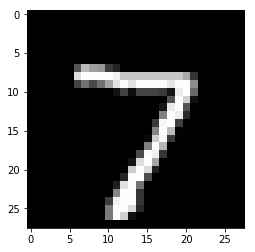

In [28]:
plt.imshow(image1, cmap='gray')

#### Image 2 - Should match Output 2

In [29]:
# Obtain the image label from bytes 800 to 1584 (28x28 - scale of the handwritten digit image)
image2 = np.array(list(image_t10k[800:1584])).reshape(28,28).astype(np.uint8)

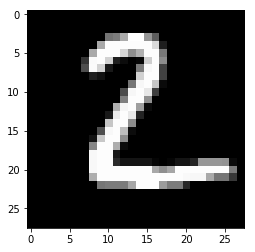

In [30]:
plt.imshow(image2, cmap='gray')

#### Image 3 - Should match Output 3

In [31]:
# Obtain the image label from bytes 3152 to 3936 (28x28 - scale of the handwritten digit image)
image3 = np.array(list(image_t10k[3152:3936])).reshape(28,28).astype(np.uint8)

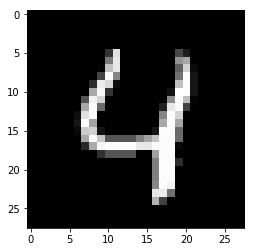

In [32]:
plt.imshow(image3, cmap='gray')

#### Image 4 - Should match Output 4

In [33]:
# Obtain the image label from bytes 5504 to 6288 (28x28 - scale of the handwritten digit image)
image4 = np.array(list(image_t10k[5504:6288])).reshape(28,28).astype(np.uint8)

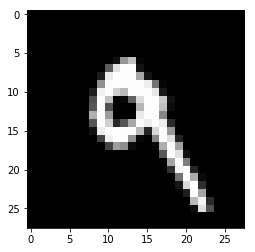

In [34]:
plt.imshow(image4, cmap='gray')

#### Image 5 - Should match Output 5

In [35]:
# Obtain the image label from bytes 7856 to 8640 (28x28 - scale of the handwritten digit image)
image6 = np.array(list(image_t10k[7856:8640])).reshape(28,28).astype(np.uint8)

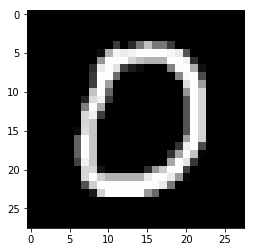

In [36]:
plt.imshow(image6, cmap='gray')

___
# Folders from train

## Handwritten Digit Image

In [37]:
# Obtain the file content type of the image_tr folder
type(image_tr)

bytes

In [38]:
# Get the first 4 bytes
image_tr[0:4]

b'\x00\x00\x08\x03'

### Convert bytes to integers in the image folders

In [39]:
# You can use image_tr[0:4] 
int.from_bytes(image_tr[0:4], byteorder='big')

2051

In [40]:
# You can use image_tr[0:4] 
int.from_bytes(image_tr[0:4], byteorder='big')

2051

In [41]:
# Bytes 4 to 8
int.from_bytes(image_tr[4:8], byteorder='big')

60000

In [42]:
# Bytes 8 to 12
int.from_bytes(image_tr[8:12], byteorder='big')

28

In [43]:
# Bytes 12 to 16
int.from_bytes(image_tr[12:16], byteorder='big')

28

In [44]:
# Bytes 16 to 17 - [value] being "??"
int.from_bytes(image_t10k[16:17], byteorder='big')

0

## Labels

In [45]:
# Obtain the file content type of the labels_t10k folder
type(labels_tr)

bytes

In [46]:
# Get the first 4 bytes
labels_tr[0:4]

b'\x00\x00\x08\x01'

### Convert bytes to integers in the labels folders
**Check if the numbers in the images match the number labels in each output**

In [47]:
# First 4 bytes
int.from_bytes(labels_tr[0:4], byteorder='big')

2049

In [48]:
# Bytes 4 to 8
int.from_bytes(labels_tr[4:8], byteorder='big')

60000

#### Output 1

In [49]:
# Bytes 8 to 9
int.from_bytes(labels_tr[8:9], byteorder='big')

5

#### Output 2

In [50]:
# Bytes 16 to 17
int.from_bytes(labels_tr[16:17], byteorder='big')

1

#### Output 3

In [51]:
# Bytes 19 to 20
int.from_bytes(labels_t10k[19:20], byteorder='big')

6

#### Image 1 - Should match Output 1

In [52]:
# Obtain the image label from bytes 16 to 800 (28x28 - scale of the handwritten digit image)
image1 = np.array(list(image_tr[16:800])).reshape(28,28).astype(np.uint8)

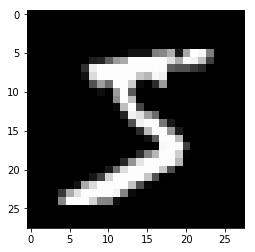

In [53]:
plt.imshow(image1, cmap='gray')

#### Image 2 - Should match Output 2

In [54]:
# Obtain the image label from bytes 6288 to 7072 (28x28 - scale of the handwritten digit image)
image2 = np.array(list(image_tr[6288:7072])).reshape(28,28).astype(np.uint8)

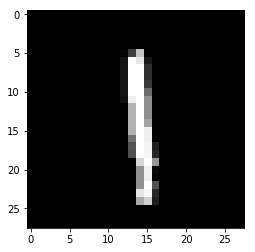

In [55]:
plt.imshow(image2, cmap='gray')

#### Image 3 - Should match Output 3

In [56]:
# Obtain the image label from bytes 8640 to 9424 (28x28 - scale of the handwritten digit image)
image3 = np.array(list(image_tr[8640:9424])).reshape(28,28).astype(np.uint8)

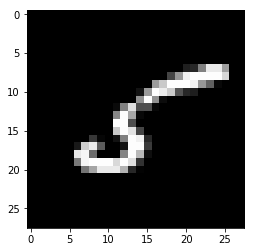

In [57]:
plt.imshow(image3, cmap='gray')